### **CHALLENGE HOUSE PRICING**

### **LIBRERIE E IMPORT**

In [17]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
# Funzione che serve ad effettuare la divisione tra train set e test set
from sklearn.model_selection import train_test_split
# Metriche per definire la qualità del modello generato
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error
# Per Scaling dei dati
from sklearn.preprocessing import StandardScaler
# Modello per la Regressione Lineare
from sklearn.linear_model import LinearRegression
# Neural Network Regression
from sklearn.neural_network import MLPRegressor
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
# Pre-processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import Ridge

### **CREAZIONE DATAFRAME**

In [18]:
# Recupero il dataframe dalla repo GitHub
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
df_train = pd.read_csv('house_prices_train.csv')
display(df_train.head())

--2026-01-03 15:09:09--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv.1’

house_prices_train. 100%[===================>] 449.88K  --.-KB/s    in 0.02s   

2026-01-03 15:09:10 (20.9 MB/s) - ‘house_prices_train.csv.1’ saved [460676/460676]



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
# Stampa le statistiche della colonna
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### **VISUALIZZAZIONE DATI**

/tmp/ipython-input-835968859.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

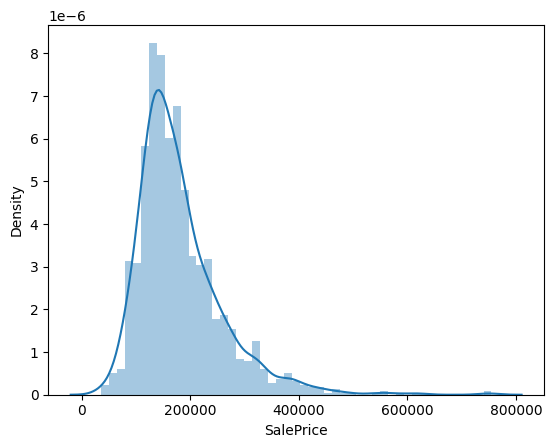

In [21]:
# Visualizziamo la distribuzione dei prezzi
sns.distplot(df_train['SalePrice'])

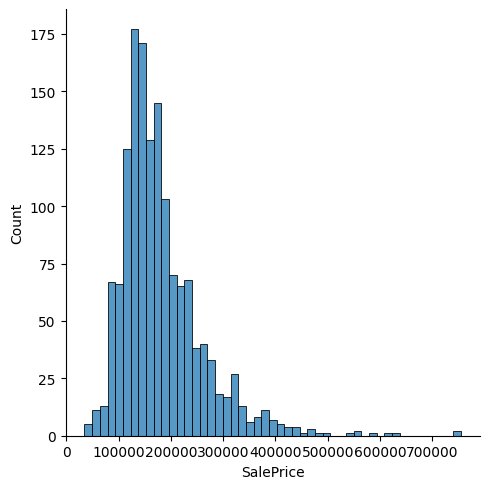

In [22]:
# Visualizziamo la distribuzione dei prezzi
sns.displot(df_train['SalePrice'])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

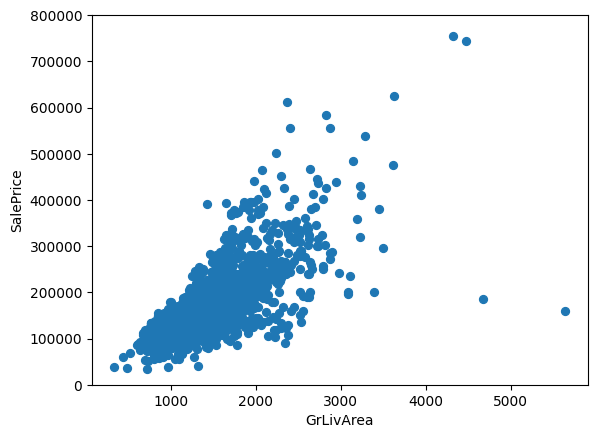

In [23]:
# Visualizziamo il prezzo di vendita vs area di soggiorno
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), s=32)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

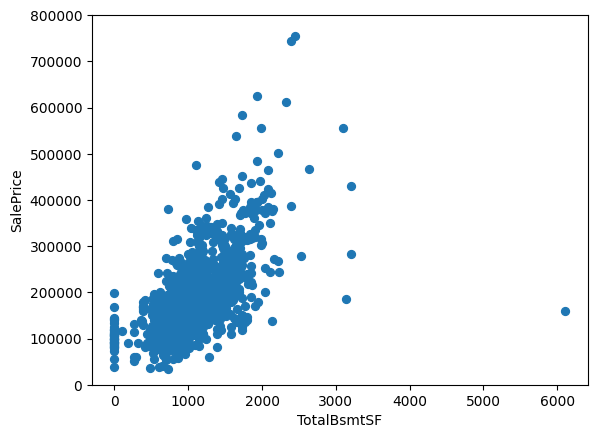

In [24]:
# Visualizziamo il prezzo di vendita vs area seminterrato
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000), s=32)

/tmp/ipython-input-404215105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data, palette="Set3", ax=ax)


(np.float64(-0.5), np.float64(9.5), np.float64(0.0), np.float64(800000.0))

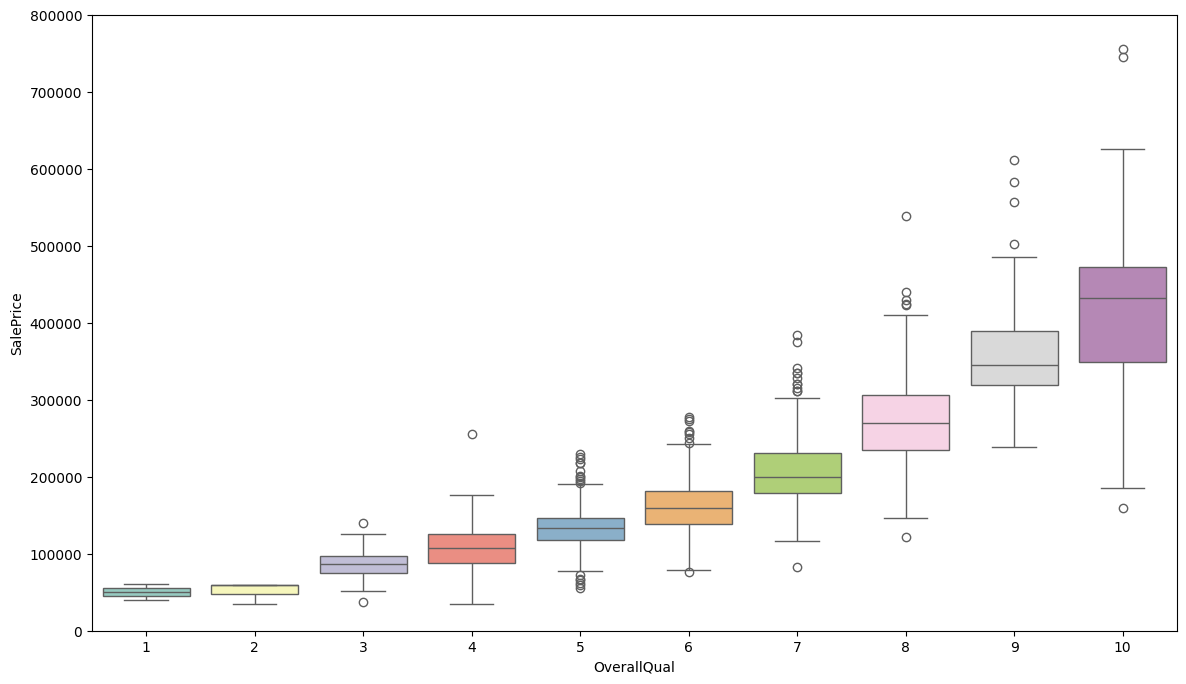

In [25]:
# Prezzo vs Qualità
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data, palette="Set3", ax=ax)
fig.axis(ymin=0, ymax=800000)

<Axes: >

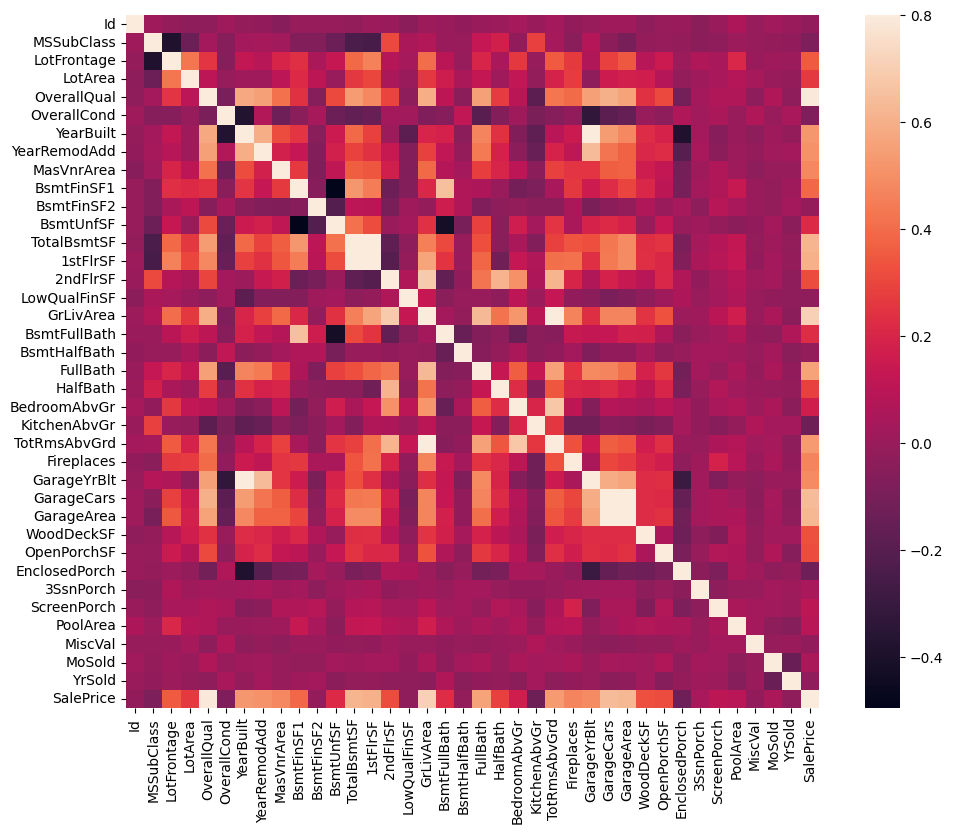

In [26]:
# Visualizziamo la matrice correlazionale delle features
corrmat = df_train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<Axes: >

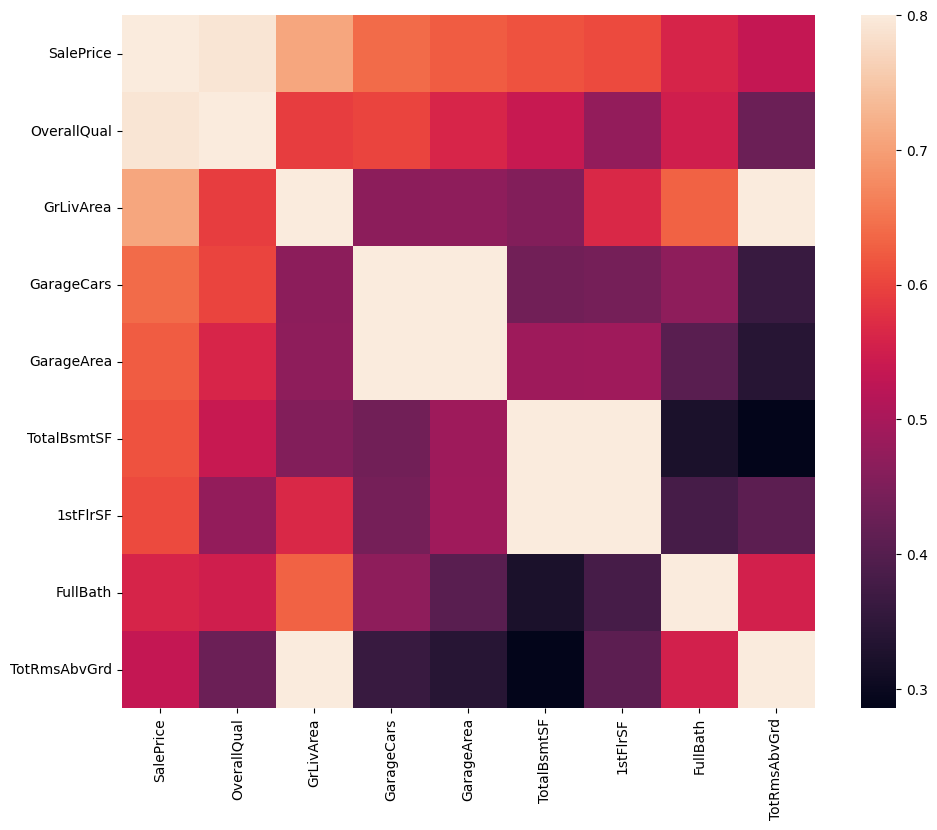

In [27]:
# Visualizziamo la matrice di correlazione per le 8 features più significative
k = 9 # Numero di variabili per la heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True)

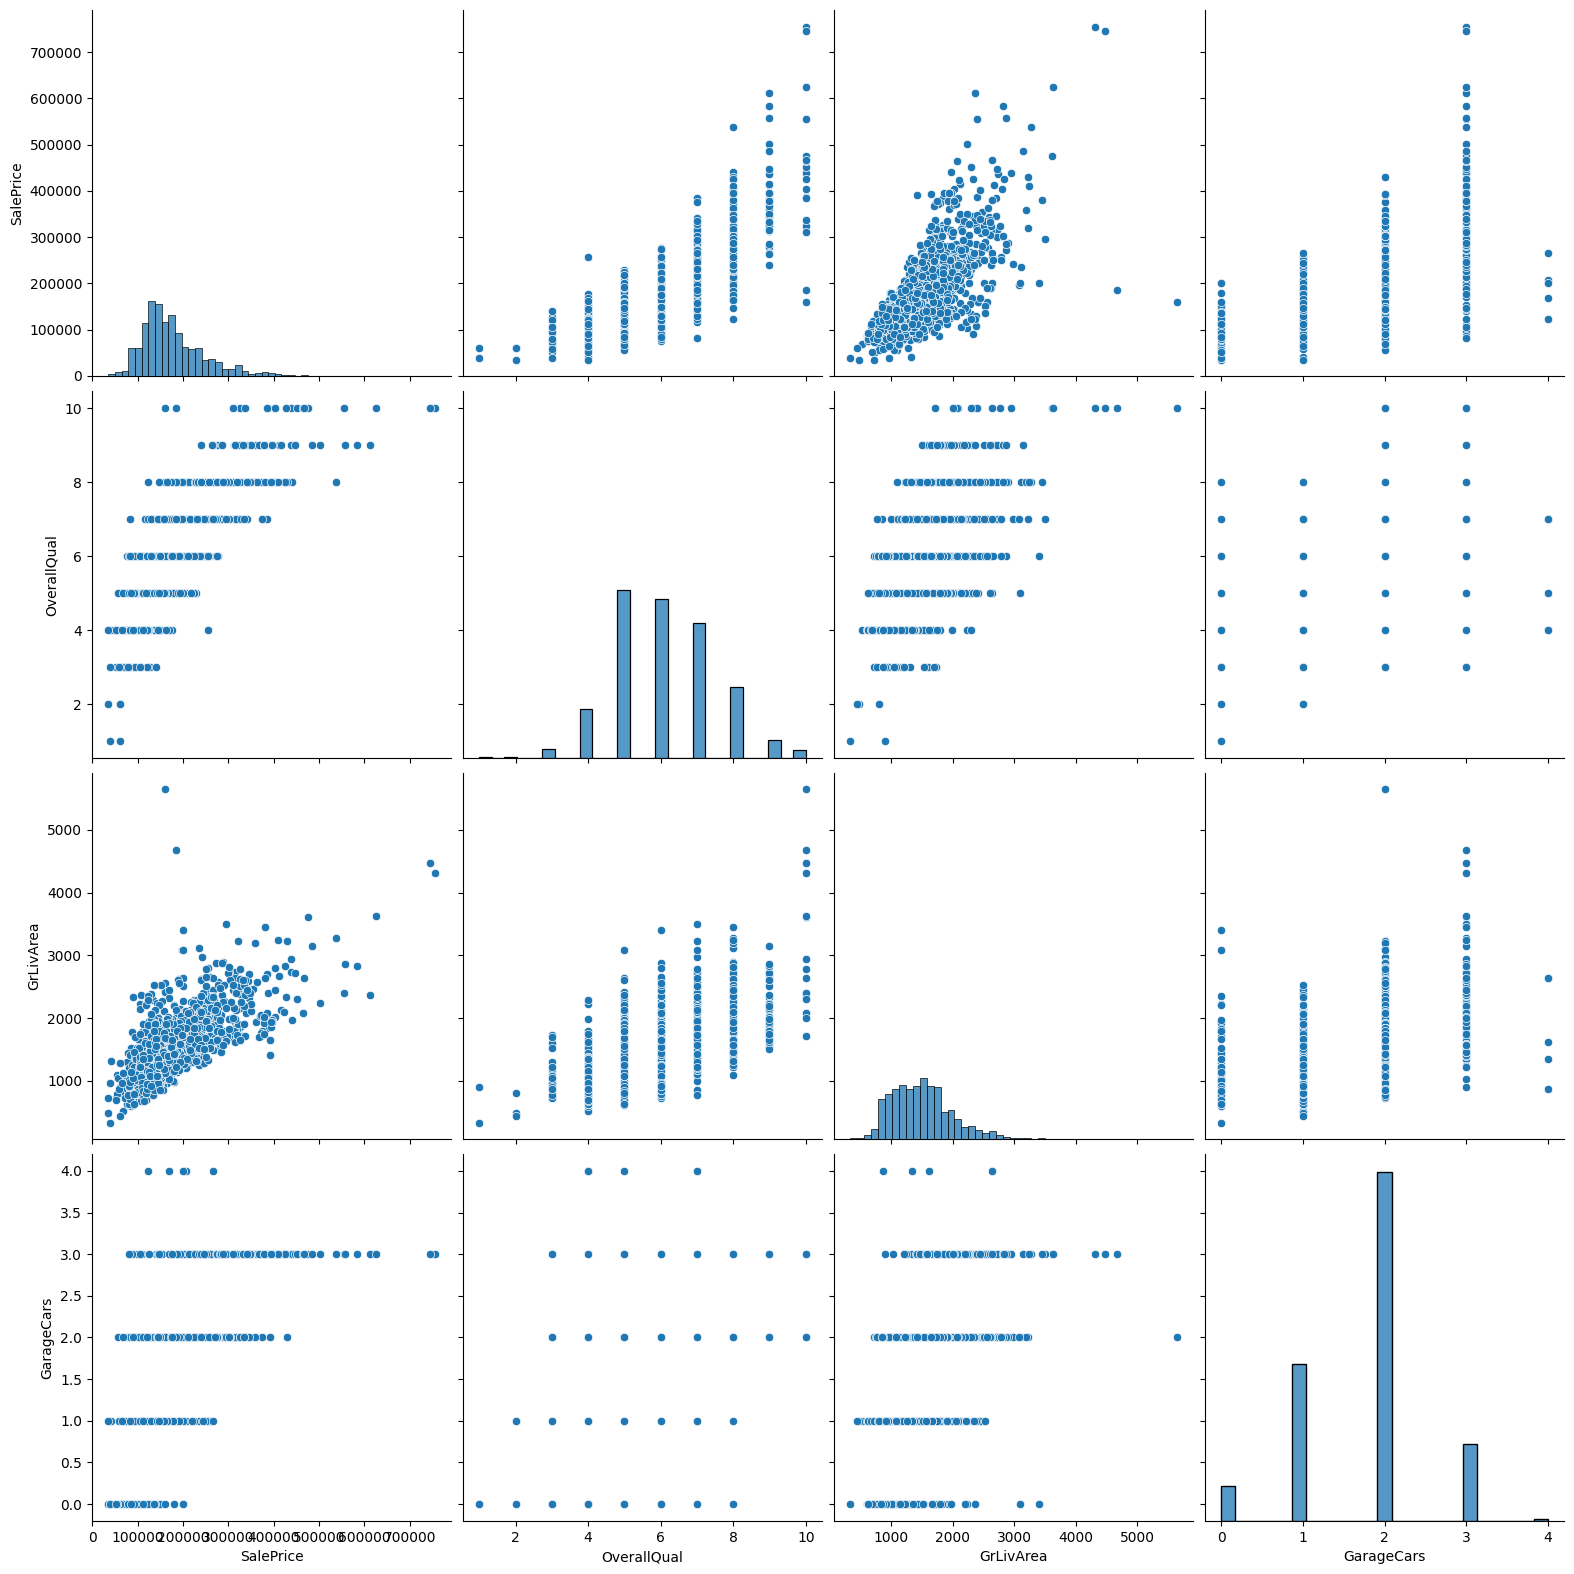

In [28]:
# Stampiamo altri grafici significativi
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], height = 4)

In [29]:
# Verifichiamo se abbiamo valori mancanti (Missing Value)
total = df_train.isnull().sum().sort_values(ascending=False)
percent = round((df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False), 2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


### **PRE-PROCESSING & SCALING DATA**

In [30]:
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
num_cols = X.select_dtypes(include=[np.number]).columns              # Prende i nomi delle colonne di X che sono numeriche (int/float)
cat_cols = X.select_dtypes(exclude=[np.number]).columns              # Prende i nomi delle colonne di X che NON sono numeriche (tipicamente stringhe/categorie)

preprocess = ColumnTransformer([                                     # Crea un trasformatore che applica preprocess diversi a colonne diverse
    ("num", Pipeline([                                               # Definisce una pipeline per le colonne numeriche (step in sequenza)
        ("imp", SimpleImputer(strategy="median")),                   # Step 1 numeriche: sostituisce i NaN con la mediana della colonna
        ("log", FunctionTransformer(np.log1p,                        # Scaling Logaritmico, in questo caso peggiora leggermnete le performace
                                    feature_names_out="one-to-one")),
        ("scaler", StandardScaler())                                 # Step 2 numeriche: standardizza (media 0, std 1) le colonne numeriche
    ]), num_cols),

    ("cat", Pipeline([                                               # Definisce una pipeline per le colonne categoriche
        ("imp", SimpleImputer(strategy="most_frequent")),            # Step 1 categoriche: sostituisce i NaN con la categoria più frequente (moda)
        ("ohe", OneHotEncoder(handle_unknown="ignore"))              # Step 2 categoriche: converte le categorie in colonne 0/1 e ignora categorie nuove in predict
    ]), cat_cols)
])

### **ROOT MEAN SQUARE ERROR**

In [34]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,50), max_iter=10000, random_state=42),
    "Decision Tree (4)": DecisionTreeRegressor(max_depth=4, random_state=42),
    "Decision Tree (10)": DecisionTreeRegressor(max_depth=10, random_state=42),
}

for name, model in regressors.items():
    start = time.time()
    pipe = Pipeline([("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    fitted_model = pipe.named_steps["model"]
    if isinstance(fitted_model, MLPRegressor):
        print("n_iter:", fitted_model.n_iter_)
        print("loss:", round(np.sqrt(fitted_model.loss_), 2))
    preds = pipe.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    end = time.time()
    print(f"{name} RMSE: {np.sqrt(mse):.2f} ({end-start:.2f}s)\n")

Linear Regression RMSE: 30581.26 (0.18s)

n_iter: 2006
loss: 17376.9
Neural Network RMSE: 29777.00 (52.69s)

Decision Tree (4) RMSE: 41333.14 (0.16s)

Decision Tree (10) RMSE: 43072.98 (0.24s)



### **NEURAL NETWORK**

In [39]:
# Verifico se scalando y e settando dei paramentri specifici posso abbassare la RMSE

# Creo una pipe per gestire lo Scaling e il setting del Modello MLP
pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(100,75), # Migliora
        learning_rate_init=1e-3, # Migliora
        alpha=1e-4, # Migliora
        early_stopping=True,
        max_iter=10000,
        random_state=42
    ))
])

y_transformer = Pipeline([
    ("log", FunctionTransformer(np.log1p,
                                inverse_func=np.expm1, # Serve a tornare allo spazio originale, così da avere la coerenza con i dati in out
                                feature_names_out="one-to-one"
                                )),
    ("scaler", StandardScaler())
])

# Scaliamo y
reg = TransformedTargetRegressor(
    regressor=pipe,
    # transformer=StandardScaler() # Ha performance migliori rispetto allo scaling log1p
    transformer=y_transformer # Peggiora leggermente le performance
)

# Addestro il modello sui dati y scalati
start = time.time()
reg.fit(X_train, y_train)
mlp = reg.regressor_.named_steps["mlp"]
print("n_iter:", mlp.n_iter_)
print("loss:", mlp.loss_) # La loss è su una scala normalizzata adesso ed è questo il motivo per cui risulta così piccola, ma è corretta!
# Valuta le predizioni
y_pred = reg.predict(X_val)
# Metriche
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
end = time.time()
print("RMSE val:", round(rmse, 2), f"({end-start:.2f}s)")

# Debug controllo outlier enormi nelle predizioni
print("y_val min/max:", round(float(y_val.min()), 2), round(float(y_val.max()), 2))
print("y_pred min/max:", round(float(np.min(y_pred)), 2), round(float(np.max(y_pred)), 2))
print("Outlier > 1M:", int((y_pred > 1_000_000).sum()), "su", len(y_pred))


n_iter: 46
loss: 0.0029914797032972234
RMSE val: 28696.11 (2.73s)
y_val min/max: 35311.0 755000.0
y_pred min/max: 53372.69 568444.89
Outlier > 1M: 0 su 438


### **CONSIDERAZIONI**

In questo dataset non avevamo a disposizione il test quindi abbiamo splittato il train in X_train, X_val e y_train, y_val, così da "simulare" un dataset di test, per le predizioni comunque abbiamo usato solo X_train e y_train, non è sbagliato.

Il modello MLP è migliorabile scalando le y, la RMSE si abbassa e il timing computazione ne trae un giovamento significativo.

Su y l’inverso (inverse_func=np.expm1) è fondamentale perché:

* Il modello predice nello spazio trasformato (log/standard), ma noi vogliamo l’output finale in dollari.